# Clustering

From the [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis):
> Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

In short, clustering is a method that groups several data or objects that similar to each other into several groups (or cluster).

Clustering method often used in learning groups or similarities between data.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

For example in this case, we are going to use breast cancer data.

Breast cancer data is a popular dataset used in many machine learning examples. The data contains recorded breast cancers with several features and two diagnosis, either the cancer is malignant or benign.

In [22]:
cancer = load_breast_cancer()

In [23]:
features = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
# target = pd.DataFrame(data=[cancer["target_names"][i] for i in cancer["target"]], columns=["target"])

# dataset = features.join(target)
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


To view the data, we will plot it using the first two features of the data, which is `mean radius` and `mean texture` of the cancer recorded

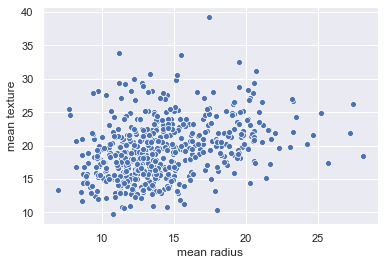

In [24]:
sns.scatterplot(data=features, x="mean radius", y="mean texture")

From the plot above, we cannot determine which data belongs to malignant class or which belongs to benign class. With clustering method, we will able to determine which of the data belong to which class.

To use clustering method, we first prepare the data

In [25]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(features)

After preparing the data, we can define the model used. In this example, we will use K-means clustering.

K-means clustering is a clustering method in which the model will group the data into K number of clusters. The value of K is different on other data and can be tuned to match data better.

Since we want to group the data into 2 class of cancer (benign and malignant), we will use `K = 2` in our clustering method.

In [26]:
from sklearn.cluster import KMeans

n_cluster = 2
model = KMeans(n_clusters=n_cluster, init="k-means++", n_init=10)

After building the model, we can fit it to the data and get our cluster prediction

In [27]:
km_pred = model.fit_predict(X)

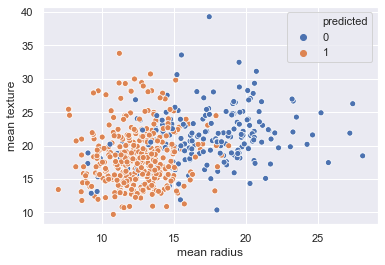

In [28]:
dataset = features.join(pd.DataFrame(km_pred, columns=["predicted"]))

sns.scatterplot(data=dataset, x="mean radius", y="mean texture", hue="predicted")

And compare with the actual cluster in the data

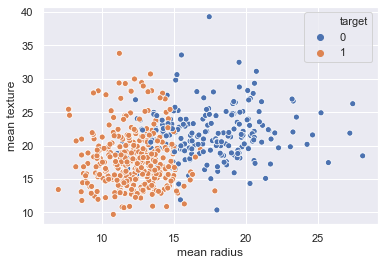

In [29]:
dataset = dataset.join(pd.DataFrame(data=cancer["target"], columns=["target"]))

sns.scatterplot(data=dataset, x="mean radius", y="mean texture", hue="target")

From our result, we can conclude that the model is able to cluster the majority of datapoints we have in the dataset, although you may notice that some data is not correctly clustered.